Author: Gustav Nilsson Pedersen - s174562@student.dtu.dk

In [247]:
import pandas as pd
import numpy as np
from scipy import stats


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# import shap #  Cannot install on Python version 3.13.0; only versions >=3.9,<3.13 are supported.

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import joblib

### Read data set with UQS and CQMs

In [248]:
# train_df = pd.read_csv('C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\raw_scores.csv', sep=';')
train_df = pd.read_csv('C:\\Users\\admin\\Desktop\\VGGFace2-200k-all.csv', sep=';')
# train_df = pd.read_csv('C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\Flickr-0to9999.csv', sep=';')
# train_df = pd.read_csv('C:\\Users\\admin\\source\\repos\\RandomForestUQS\\combined_files.csv', sep=';')
# train_df = pd.read_csv('C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\Flickr-only.csv', sep=';')

# raw_df = pd.read_csv('C:\\Users\\admin\\source\\repos\\OFIQ-Project\\install_x86_64\\Release\\bin\\LFW_scores.csv', sep=';')
# raw_copy_df = raw_df

# specific_dataset_df = pd.read_csv("C:\\Users\\admin\\source\\repos\\HelperScripts\\output_files\\VGGFace-200k-431-502.csv", sep=';')

C:\Users\admin\AppData\Local\Temp\ipykernel_18232\3523667586.py:2: DtypeWarning: Columns (15,43) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('C:\\Users\\admin\\Desktop\\VGGFace2-200k-all.csv', sep=';')


In [249]:
# specific_dataset_df.head()

### Inspect data

In [250]:
#train_df.columns

In [251]:
train_df.describe()

,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,CompressionArtifacts,...,LeftwardCropOfTheFaceImage.scalar,RightwardCropOfTheFaceImage.scalar,MarginAboveOfTheFaceImage.scalar,MarginBelowOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57
count,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,195788.000000,195788.000000,197684.000000,197684.000000,197684.000000,...,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,197684.000000,0.0
mean,21.231196,80.664214,0.411592,0.262675,0.022222,0.211277,0.000570,6.779410,39.379429,0.838543,...,99.949283,99.952181,49.640062,47.061239,86.040292,95.182974,95.729143,46.441513,91.646405,NaN
std,3.933268,74.322003,0.218670,0.116430,0.016821,0.209541,0.008520,0.629621,18.780816,0.076957,...,2.101427,2.008245,33.027875,23.085901,20.928868,10.167331,10.403484,28.569081,24.834834,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,18.226044,28.511613,0.242798,0.176984,0.010652,0.059145,0.000000,6.488656,42.000000,0.795383,...,100.000000,100.000000,16.000000,31.000000,82.000000,95.000000,96.000000,19.000000,100.000000,NaN
50%,21.227950,61.484994,0.427597,0.252320,0.018125,0.133240,0.000000,6.900752,47.000000,0.858716,...,100.000000,100.000000,55.000000,49.000000,96.000000,98.000000,99.000000,41.000000,100.000000,NaN
75%,24.228010,110.766834,0.590830,0.336969,0.028969,0.296119,0.000000,7.209606,47.000000,0.895513,...,100.000000,100.000000,80.000000,64.000000,99.000000,100.000000,100.000000,72.000000,100.000000,NaN
max,35.189240,2056.000000,1.000000,0.868540,0.189381,1.000000,0.660669,7.960028,50.000000,0.997724,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,NaN


In [252]:
train_df.dtypes

Filename                               object
UnifiedQualityScore                   float64
BackgroundUniformity                  float64
IlluminationUniformity                float64
LuminanceMean                         float64
LuminanceVariance                     float64
UnderExposurePrevention               float64
OverExposurePrevention                float64
DynamicRange                          float64
Sharpness                               int64
CompressionArtifacts                  float64
NaturalColour                         float64
SingleFacePresent                     float64
EyesOpen                              float64
MouthClosed                           float64
EyesVisible                            object
MouthOcclusionPrevention              float64
FaceOcclusionPrevention               float64
InterEyeDistance                      float64
HeadSize                              float64
LeftwardCropOfTheFaceImage            float64
RightwardCropOfTheFaceImage       

In [253]:
non_float_cells = train_df[train_df['EyesVisible'].apply(lambda x: x == '-nan(ind)')]

print(non_float_cells["EyesVisible"])

# OLD:
# # Remove rows where EyesVisible measure computation has failed 
# train_df = train_df[~train_df['EyesVisible'].apply(lambda x: x == '-nan(ind)')]

def convert_nanind_to_0(value):
    if value == '-nan(ind)':
        return 0
    else:
        return value

# Set EyesVisible.scalar score to the lowest value of 0
train_df['EyesVisible.scalar'] = train_df['EyesVisible.scalar'].apply(lambda x: convert_nanind_to_0(x))
train_df['EyesVisible.scalar'] = train_df['EyesVisible.scalar'].astype(int)



# #also do it for the file to predict on
# test_what_we_remove = specific_dataset_df[specific_dataset_df['EyesVisible'].apply(lambda x: x == '-nan(ind)')]
# test_missing = test_what_we_remove[test_what_we_remove['Filename'].apply(lambda x: '45-0252_03' in x)]
# print(test_what_we_remove['Filename'])
# print(test_missing)
# print(len(test_what_we_remove))
# specific_dataset_df = specific_dataset_df[~specific_dataset_df['EyesVisible'].apply(lambda x: x == '-nan(ind)')]



813       -nan(ind)
5943      -nan(ind)
6210      -nan(ind)
6293      -nan(ind)
8913      -nan(ind)
            ...    
192979    -nan(ind)
193426    -nan(ind)
193610    -nan(ind)
193715    -nan(ind)
194407    -nan(ind)
Name: EyesVisible, Length: 167, dtype: object


In [254]:
# test_missing

In [255]:
# What is z-score exactly again?
#stats.zscore(train_df['MarginBelowOfTheFaceImage']).sort_values().tail(10)

In [256]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False))

,0
Unnamed: 57,197517
UnderExposurePrevention,1875
OverExposurePrevention,1875
UnifiedQualityScore,0
BackgroundUniformity,0
Filename,0
LuminanceVariance,0
LuminanceMean,0
DynamicRange,0
IlluminationUniformity,0


In [257]:
train_df['EyesVisible.scalar'].unique()
# Unique can help identify nan values 
#UnderExposurePrevention.scalar does not have nan but has -1. Maybe same with OverExposurePrevention, check.
# Use .fillna to fill nan values

array(['100', '99', '97', '95', '96', '98', '91', '87', '92', '88', '86',
       '93', '89', '82', '94', '55', '79', '54', '42', '90', '63', '83',
       '68', '84', '85', '47', '0', '72', '1', '33', '60', '56', '59',
       '66', '62', '78', '8', '4', '52', '21', '61', '2', '31', '40',
       '80', '5', '71', '41', '27', '26', '3', '6', '73', '23', '81',
       '75', '77', '7', '10', '16', '38', '15', '46', '29', '12', '30',
       '43', '36', '19', '22', '44', '53', '51', '25', '74', '45', '48',
       '69', '70', '76', '67', '64', '65', '39', '58', '50', '35', '11',
       '9', '57', '32', '28', '49', '13', '-1', '37', '14', '24', '20',
       '18', '17', '34', 100, 97, 99, 92, 98, 95, 96, 87, 93, 84, 94, 79,
       86, 85, 91, 69, 83, 89, 81, 90, 76, 57, 0, 60, 61, 80, 78, 82, 68,
       64, 39, 48, 24, 34, 73, 70, 77, 35, 74, 4], dtype=object)

In [258]:
#specific correlations between two CQMs
#train_df['MouthClosed'].corr(train_df['ExpressionNeutrality'])

## Choose to work with native or scalar scores and measures

In [259]:
# Save dataframe with filenames before dropping columns
# filenames = train_df["Filename"]


# filenames_specific_dataset = specific_dataset_df["Filename"]



In [260]:
# Predict scalar UQS based on scalar CQMs
train_df = train_df.drop(columns=['Filename', 'UnifiedQualityScore', 'BackgroundUniformity',
       'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance',
       'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange',
       'Sharpness', 'CompressionArtifacts', 'NaturalColour',
       'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible',
       'MouthOcclusionPrevention', 'FaceOcclusionPrevention',
       'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage',
       'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage',
       'MarginBelowOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch',
       'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings', 'Unnamed: 57'])
# raw_df = raw_df.drop(columns=['Filename', 'UnifiedQualityScore', 'BackgroundUniformity',
#        'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance',
#        'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange',
#        'Sharpness', 'CompressionArtifacts', 'NaturalColour',
#        'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible',
#        'MouthOcclusionPrevention', 'FaceOcclusionPrevention',
#        'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage',
#        'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage',
#        'MarginBelowOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch',
#        'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings', 'Unnamed: 57'])
# specific_dataset_df = specific_dataset_df.drop(columns=['Filename', 'UnifiedQualityScore', 'BackgroundUniformity',
#        'IlluminationUniformity', 'LuminanceMean', 'LuminanceVariance',
#        'UnderExposurePrevention', 'OverExposurePrevention', 'DynamicRange',
#        'Sharpness', 'CompressionArtifacts', 'NaturalColour',
#        'SingleFacePresent', 'EyesOpen', 'MouthClosed', 'EyesVisible',
#        'MouthOcclusionPrevention', 'FaceOcclusionPrevention',
#        'InterEyeDistance', 'HeadSize', 'LeftwardCropOfTheFaceImage',
#        'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage',
#        'MarginBelowOfTheFaceImage', 'HeadPoseYaw', 'HeadPosePitch',
#        'HeadPoseRoll', 'ExpressionNeutrality', 'NoHeadCoverings', 'Unnamed: 57'])

# Also drop CQMs that are not in landmarked region
# train_df = train_df.drop(columns=['BackgroundUniformity.scalar', 'SingleFacePresent.scalar',
#        'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar',  'NoHeadCoverings.scalar'])
# raw_df = raw_df.drop(columns=['BackgroundUniformity.scalar', 'SingleFacePresent.scalar',
#        'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar',  'NoHeadCoverings.scalar'])

# Predict native UQS based on native CQMs
# train_df = train_df.drop(columns=['Filename', 'UnifiedQualityScore.scalar', 'BackgroundUniformity.scalar',
#        'IlluminationUniformity.scalar', 'LuminanceMean.scalar', 'LuminanceVariance.scalar',
#        'UnderExposurePrevention.scalar', 'OverExposurePrevention.scalar', 'DynamicRange.scalar',
#        'Sharpness.scalar', 'CompressionArtifacts.scalar', 'NaturalColour.scalar',
#        'SingleFacePresent.scalar', 'EyesOpen.scalar', 'MouthClosed.scalar', 'EyesVisible.scalar',
#        'MouthOcclusionPrevention.scalar', 'FaceOcclusionPrevention.scalar',
#        'InterEyeDistance.scalar', 'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar', 'HeadPoseYaw.scalar', 'HeadPosePitch.scalar',
#        'HeadPoseRoll.scalar', 'ExpressionNeutrality.scalar', 'NoHeadCoverings.scalar', 'Unnamed: 57'])
# raw_df = raw_df.drop(columns=['Filename', 'UnifiedQualityScore.scalar', 'BackgroundUniformity.scalar',
#        'IlluminationUniformity.scalar', 'LuminanceMean.scalar', 'LuminanceVariance.scalar',
#        'UnderExposurePrevention.scalar', 'OverExposurePrevention.scalar', 'DynamicRange.scalar',
#        'Sharpness.scalar', 'CompressionArtifacts.scalar', 'NaturalColour.scalar',
#        'SingleFacePresent.scalar', 'EyesOpen.scalar', 'MouthClosed.scalar', 'EyesVisible.scalar',
#        'MouthOcclusionPrevention.scalar', 'FaceOcclusionPrevention.scalar',
#        'InterEyeDistance.scalar', 'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar', 'HeadPoseYaw.scalar', 'HeadPosePitch.scalar',
#        'HeadPoseRoll.scalar', 'ExpressionNeutrality.scalar', 'NoHeadCoverings.scalar', 'Unnamed: 57'])


# Predict scalar UQS based on native CQMs
# train_df = train_df.drop(columns=['Filename', 'UnifiedQualityScore', 'BackgroundUniformity.scalar',
#        'IlluminationUniformity.scalar', 'LuminanceMean.scalar', 'LuminanceVariance.scalar',
#        'UnderExposurePrevention.scalar', 'OverExposurePrevention.scalar', 'DynamicRange.scalar',
#        'Sharpness.scalar', 'CompressionArtifacts.scalar', 'NaturalColour.scalar',
#        'SingleFacePresent.scalar', 'EyesOpen.scalar', 'MouthClosed.scalar', 'EyesVisible.scalar',
#        'MouthOcclusionPrevention.scalar', 'FaceOcclusionPrevention.scalar',
#        'InterEyeDistance.scalar', 'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar', 'HeadPoseYaw.scalar', 'HeadPosePitch.scalar',
#        'HeadPoseRoll.scalar', 'ExpressionNeutrality.scalar', 'NoHeadCoverings.scalar', 'Unnamed: 57'])
# raw_df = raw_df.drop(columns=['Filename', 'UnifiedQualityScore', 'BackgroundUniformity.scalar',
#        'IlluminationUniformity.scalar', 'LuminanceMean.scalar', 'LuminanceVariance.scalar',
#        'UnderExposurePrevention.scalar', 'OverExposurePrevention.scalar', 'DynamicRange.scalar',
#        'Sharpness.scalar', 'CompressionArtifacts.scalar', 'NaturalColour.scalar',
#        'SingleFacePresent.scalar', 'EyesOpen.scalar', 'MouthClosed.scalar', 'EyesVisible.scalar',
#        'MouthOcclusionPrevention.scalar', 'FaceOcclusionPrevention.scalar',
#        'InterEyeDistance.scalar', 'HeadSize.scalar', 'LeftwardCropOfTheFaceImage.scalar',
#        'RightwardCropOfTheFaceImage.scalar', 'MarginAboveOfTheFaceImage.scalar',
#        'MarginBelowOfTheFaceImage.scalar', 'HeadPoseYaw.scalar', 'HeadPosePitch.scalar',
#        'HeadPoseRoll.scalar', 'ExpressionNeutrality.scalar', 'NoHeadCoverings.scalar', 'Unnamed: 57'])


## Feature engineering

In [261]:
# train_df['MeanCropScore'] = (train_df['LeftwardCropOfTheFaceImage'] + train_df['RightwardCropOfTheFaceImage']) / 2
# train_df['MeanCropScore.scalar'] = (train_df['LeftwardCropOfTheFaceImage.scalar'] + train_df['RightwardCropOfTheFaceImage.scalar']) / 2

In [262]:
# train_df['MeanCropScore'].head(15)
# train_df['MeanCropScore.scalar'].head(15)

In [263]:
# train_df['MeanMarginScore'] = (train_df['MarginBelowOfTheFaceImage'] + train_df['MarginAboveOfTheFaceImage']) / 2
# train_df['MeanMarginScore.scalar'] = (train_df['MarginBelowOfTheFaceImage.scalar'] + train_df['MarginAboveOfTheFaceImage.scalar']) / 2


In [264]:
# train_df['MeanMarginScore'].head(15)
# train_df['MeanMarginScore.scalar'].head(15)

## Check correlations and drop some correlated features

<Axes: >

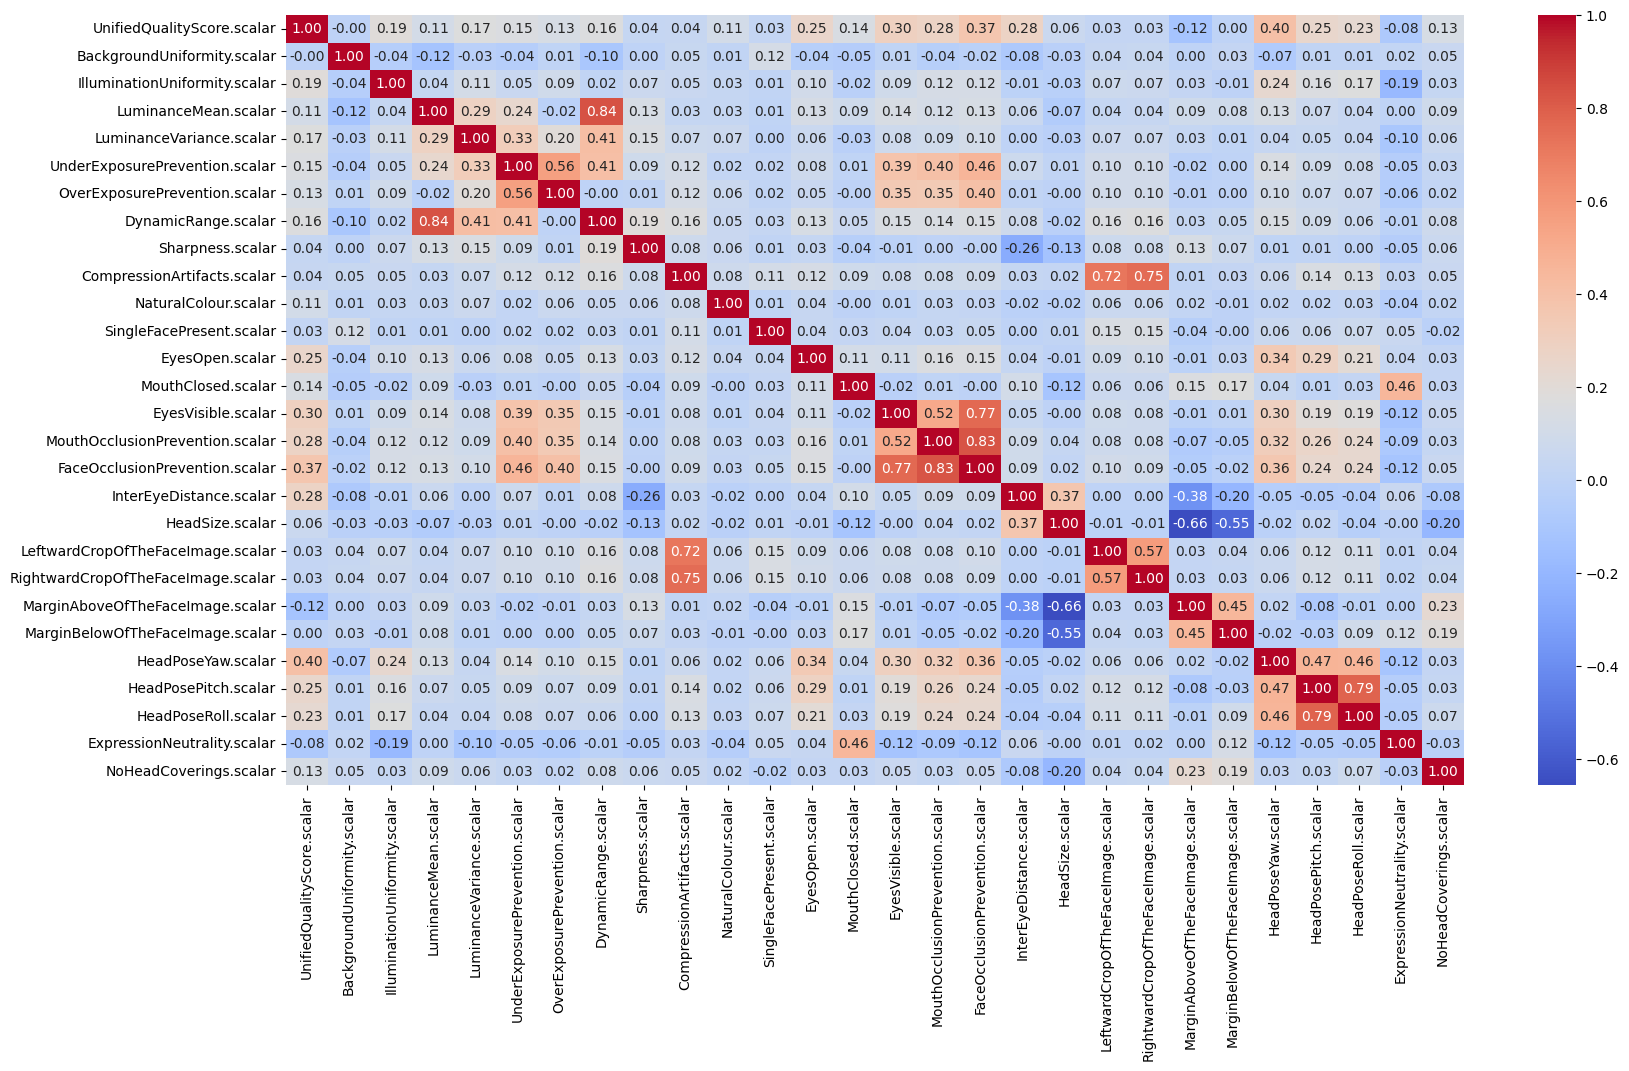

In [265]:
correlations = train_df.corr()
plt.figure(figsize=(19,10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")

In [266]:
# FaceOcclusionPrevention or EyesVisible and MouthOcclusionPrevention?
# Remove ExpressionNeutrality or the ones it correlates with?
# train_df = train_df.drop(columns=['DynamicRange', 'HeadSize',
#                                   'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 
#                                   'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage'])
# train_df = train_df.drop(columns=['DynamicRange.scalar', 'HeadSize.scalar',
#                                   'LeftwardCropOfTheFaceImage.scalar', 'RightwardCropOfTheFaceImage.scalar', 
#                                   'MarginAboveOfTheFaceImage.scalar', 'MarginBelowOfTheFaceImage.scalar'])

<Axes: >

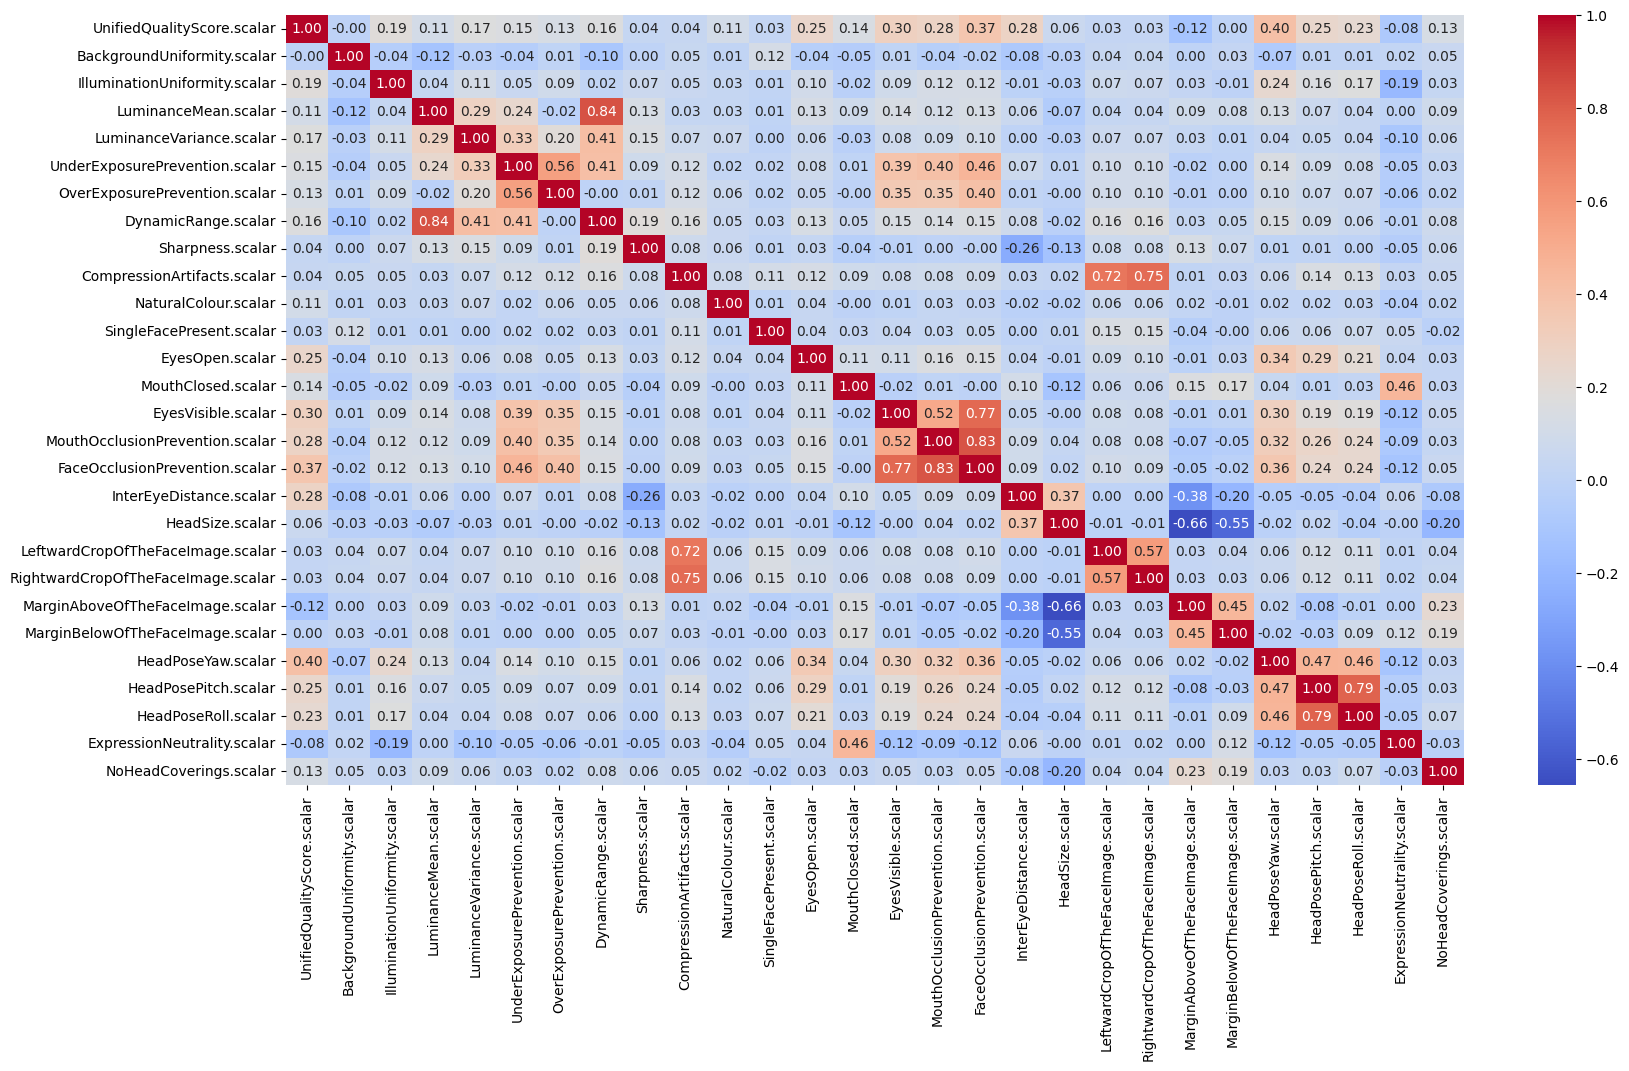

In [267]:
corr_after_drop = train_df.corr()
plt.figure(figsize=(19,10))
sns.heatmap(corr_after_drop, annot=True, cmap='coolwarm', fmt=".2f")

## UQS histogram

<Axes: xlabel='UnifiedQualityScore.scalar', ylabel='Count'>

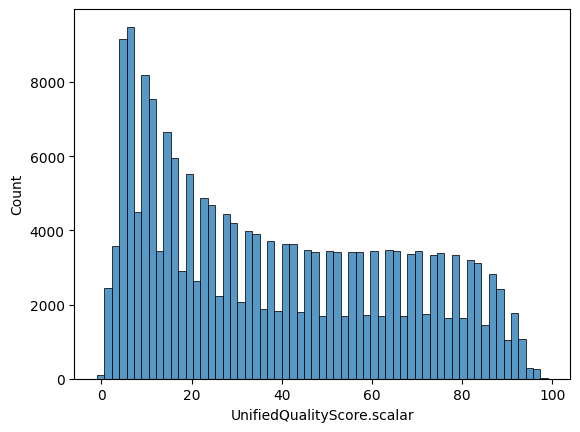

In [268]:
# sns.histplot(
#     train_df,
#     x=train_df['UnifiedQualityScore']
# )

sns.histplot(
    train_df,
    x=train_df['UnifiedQualityScore.scalar']
)

In [269]:
# Consider logarithmic on non-scalar scores, so UnifiedQualityScore for example 
# train_df['UnifiedQualityScore_Log'] = np.log1p(train_df['UnifiedQualityScore'])

In [270]:
column_names = train_df.select_dtypes(include=['int64', 'float64']).columns
# column_names = column_names.drop('UnifiedQualityScore')
column_names = column_names.drop('UnifiedQualityScore.scalar')

In [271]:
# Impute to fill missing values. Might not be necessary...
impute_and_scale_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [272]:
columns_transformed = ColumnTransformer(transformers=[
    ('num_p', impute_and_scale_pipeline, column_names)
    ],
    remainder='passthrough', 
    n_jobs=-1)

In [273]:
preprocess_pipeline = Pipeline(steps=[
    ('preprocessing', columns_transformed)
])

In [274]:
# X = train_df.drop('UnifiedQualityScore', axis=1)
# y = train_df['UnifiedQualityScore']
# X_raw = raw_df.drop('UnifiedQualityScore', axis=1)
# y_raw = raw_df['UnifiedQualityScore']

X = train_df.drop('UnifiedQualityScore.scalar', axis=1)
y = train_df['UnifiedQualityScore.scalar']
# X_raw = raw_df.drop('UnifiedQualityScore.scalar', axis=1)
# y_raw = raw_df['UnifiedQualityScore.scalar']
# X_specific_dataset = specific_dataset_df.drop('UnifiedQualityScore.scalar', axis=1)
# y_specific_dataset = specific_dataset_df['UnifiedQualityScore.scalar']

In [275]:
X_preprocessed = preprocess_pipeline.fit_transform(X)
# X_raw_preprocessed = preprocess_pipeline.fit_transform(X_raw)
# X_specific_dataset_preprocessed = preprocess_pipeline.fit_transform(X_specific_dataset)

# X_train, X_test, y_train, y_test, filenames_train, filenames_test = train_test_split(X_preprocessed, y, filenames, test_size=0.2, random_state=36)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=36)

In [276]:
random_forest_regressor = RandomForestRegressor(random_state=36)

In [277]:
# there are more parameters that we can try to optimize
# Also, maybe consider using Optuna instead
# grid_parameters = {
#     'max_depth': [30],
#     'n_estimators': [1500],
#     'min_samples_split': [15]
# }
# max_depth: 15, n_estimators: 500, min_samples_split: 10
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives np.float64(2.171904031005836) and 4.803700372340917
# {'max_depth': 12, 'min_samples_split': 10, 'n_estimators': 300} gives np.float64(2.200307762445381) and 4.981448913268783
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives np.float64(2.205441896749015) and 5.02581339484137 with a lot of columns removed
# Removing a lot of columns and FaceOcclusionPrevention as well makes it worse
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives np.float64(2.1872035509314802) and 4.865764880207847 with some luminance stuff removed, headsize removed, margin averaged and crop averaged.
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 2.1734324686963307 and 4.820639260484793 with ['DynamicRange', 'HeadSize', 'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage']
#           removed and crop averaged and margin averaged.
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 17.560840972964996 and 310.4379027848181 with scalar version of ['DynamicRange', 'HeadSize', 'LeftwardCropOfTheFaceImage', 'RightwardCropOfTheFaceImage', 'MarginAboveOfTheFaceImage', 'MarginBelowOfTheFaceImage']
#           removed and crop averaged and margin averaged.
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 17.520939310617074 and 308.58041605776316 with everything kept (scalar)
#{'max_depth': 30, 'min_samples_split': 15, 'n_estimators': 1500} gives 17.32108712973725 and 298.34084529501126 using all native CQMs to predict scalar UQS. Takes a looong time to train though. 
 


In [278]:
# Create grid for RandomSearchCV

# === BROAD 1 ===
# n_estimators = [int(i) for i in np.linspace(start = 200, stop = 2000, num = 10)]
# max_depth = [int(i) for i in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# max_features = ["sqrt"]
# min_samples_leaf = [1, 2, 4]
# min_samples_split = [2, 5, 10, 20]
# bootstrap = [True, False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}




# === BROAD 2 ===
# n_estimators = [200, 400, 600, 800, 1000]
# max_depth = [20, 30, 40, 50] # After BROAD 2 results: Low values are not good.
# max_features = ["sqrt"]
# min_samples_leaf = [1, 2, 4, 8, 15, 25] # After BROAD 2 results: High values are not good.
# min_samples_split = [2, 5, 10, 20, 40] # After BROAD 2 results: High values are not good
# bootstrap = [True, False] # After BROAD 2 results: seems to perform better without bootstrapping

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}





# === BROAD 3 ===
# n_estimators = [150, 250, 500, 1000] # After BROAD 3 results: Larger does seem to perform better, but is not as important as the other parameters.
# max_depth = [30, 40, 50] # After BROAD 3 results: Deeper performs better
# max_features = ["sqrt"]
# min_samples_leaf = [1, 2, 4, 8] # After BROAD 3 results: 2 is definitely better than 1 and 2 seems to be the best performing no matter the n_estimators.
# min_samples_split = [2, 5, 10, 20] # After BROAD 3 results: 5 seems to be best performing, 10 also really good. I think 2 is also good but the model becomes too large.
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}






# === BROAD 4 ===
# After results: Not much to say tbh because so many of the fits failed due to lack of memory.
# n_estimators = [150, 250, 500, 1000] 
# max_depth = [40, 50]
# max_features = ["sqrt"]
# min_samples_leaf = [2, 3, 4]
# min_samples_split = [2, 5, 10]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}



# === SPECIFIC 1 ===
# n_estimators = [1000] 
# max_depth = [50]
# max_features = ["sqrt"]
# min_samples_leaf = [3]
# min_samples_split = [5]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}



# # === SPECIFIC 2 ===
# n_estimators = [1000] 
# max_depth = [50]
# max_features = ["sqrt"]
# min_samples_leaf = [2]
# min_samples_split = [5]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}





# === SPECIFIC 3 ===
# # Results: worse than SPECIFIC 2
# n_estimators = [1000] 
# max_depth = [50]
# max_features = ["sqrt"]
# min_samples_leaf = [2]
# min_samples_split = [3]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}



# === SPECIFIC 4 ===
# # Result: Worse than SPECIFIC 2
# n_estimators = [1000] 
# max_depth = [50]
# max_features = ["sqrt"]
# min_samples_leaf = [2]
# min_samples_split = [6]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}






# === SPECIFIC 5 ===
# Results: Best performing so far (better than SPECIFIC 2)
# n_estimators = [1000] 
# max_depth = [50]
# max_features = ["sqrt"]
# min_samples_leaf = [2]
# min_samples_split = [4]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}






# # === SPECIFIC 6 ===
# # Results: worse than SPECIFIC 5
# n_estimators = [1000] 
# max_depth = [50]
# max_features = ["sqrt"]
# min_samples_leaf = [2]
# min_samples_split = [4]
# bootstrap = [True]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}






# === SPECIFIC 7 ===
# Results: Performed horribly. Also, takes a lot of time to train (52 minutes) because we consider all features.
# n_estimators = [1000] 
# max_depth = [50]
# max_features = [1.0]
# min_samples_leaf = [2]
# min_samples_split = [4]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}



# === SPECIFIC 8 ===
# # Results: Best so far.
# n_estimators = [1000] 
# max_depth = [50]
# max_features = [7]
# min_samples_leaf = [2]
# min_samples_split = [4]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}




# === SPECIFIC 9 ===
# Results: Best so far. Better than SPECIFIC 8.
n_estimators = [1000] 
max_depth = [50]
max_features = [6]
min_samples_leaf = [2]
min_samples_split = [4]
bootstrap = [False]

randomized_search_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}






# === SPECIFIC 10 ===
# # Results: Worse.
# n_estimators = [1000] 
# max_depth = [50]
# max_features = [4]
# min_samples_leaf = [2]
# min_samples_split = [4]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}




# === SPECIFIC 11 ===
# # Results: Worse.
# n_estimators = [1000] 
# max_depth = [50]
# max_features = [6]
# min_samples_leaf = [3]
# min_samples_split = [6]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}




# # === SPECIFIC 12 ===
# # Results: Quite good, but worse than 9.
# n_estimators = [1000] 
# max_depth = [50]
# max_features = [6]
# min_samples_leaf = [1]
# min_samples_split = [4]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}


# # === SPECIFIC 13 ===
# # Results: Failed due to lack of memory at 1000 estimators. Also failed two of the fits at 800, but the one score was quite low. 
# n_estimators = [800] 
# max_depth = [50]
# max_features = [6]
# min_samples_leaf = [1]
# min_samples_split = [2]
# bootstrap = [False]

# randomized_search_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'max_features': max_features,
#                'min_samples_leaf': min_samples_leaf,
#                'min_samples_split': min_samples_split,
#                'bootstrap': bootstrap}



In [279]:
# random_forest_cross_val = GridSearchCV(random_forest_regressor, grid_parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
random_forest_cross_val = RandomizedSearchCV(estimator = random_forest_regressor, 
                                             param_distributions = randomized_search_grid,
                                             n_iter = 30,
                                            #  cv = 3,
                                             cv = 5,
                                             verbose=3,
                                             random_state=36,
                                             n_jobs = -1)

In [280]:
k_neigbors_regressor = KNeighborsRegressor()


In [281]:
k_neighbors_cross_val = RandomizedSearchCV(estimator = k_neigbors_regressor, 
                                             param_distributions = {'n_neighbors': [15, 20, 25, 30, 35],
                                                                    'weights': ['distance']},
                                             n_iter = 30,
                                            #  cv = 3,
                                             cv = 5,
                                             verbose=3,
                                             random_state=36,
                                             n_jobs = -1)

In [282]:
# random_forest_cross_val.fit(X_train, y_train)
k_neighbors_cross_val.fit(X_train, y_train)

c:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 5 is smaller than n_iter=30. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'n_neighbors': [15, 20, 25, 30, 35],
                                        'weights': ['distance']},
                   random_state=36, verbose=3)

In [283]:
results_of_n_neighbors_cv = pd.DataFrame(k_neighbors_cross_val.cv_results_)
results_of_n_neighbors_cv.to_csv("./results_of_RandomizedSearchCVs/results_of_n_neighbors_cv.csv", sep=';')

In [284]:
results_of_n_neighbors_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.101568,0.006237,23.117683,1.465994,distance,15,"{'weights': 'distance', 'n_neighbors': 15}",0.474191,0.473083,0.473046,0.465361,0.465955,0.470327,0.003839,5
1,0.138624,0.023922,25.977403,0.258613,distance,20,"{'weights': 'distance', 'n_neighbors': 20}",0.476435,0.475415,0.476950,0.469438,0.467311,0.473110,0.003955,2
2,0.170089,0.037707,26.985237,0.383857,distance,25,"{'weights': 'distance', 'n_neighbors': 25}",0.477848,0.476811,0.476822,0.470696,0.466967,0.473829,0.004264,1
3,0.205361,0.025780,23.217067,1.750422,distance,30,"{'weights': 'distance', 'n_neighbors': 30}",0.476889,0.476276,0.475002,0.470083,0.467024,0.473055,0.003849,3
4,0.197545,0.021676,19.368969,0.886967,distance,35,"{'weights': 'distance', 'n_neighbors': 35}",0.475979,0.475240,0.472766,0.468294,0.465347,0.471525,0.004094,4


In [285]:
# random_forest_cross_val.best_estimator_

In [286]:
# random_forest_cross_val.best_params_

In [287]:
# results_of_randomized_search_cv = pd.DataFrame(random_forest_cross_val.cv_results_)
# results_of_randomized_search_cv.to_csv("results_of_randomized_search_cv.csv", sep=';')

In [288]:
# results_of_randomized_search_cv

In [289]:
model_filename = "./models/rfr_UQS_scalar_to_scalar_KNeighbors_VGGFace-200k.pkl"

In [290]:

joblib.dump(k_neighbors_cross_val.best_estimator_, model_filename)

['rfr_UQS_scalar_to_scalar_KNeighbors_VGGFace-200k.pkl']

In [76]:
load_saved_model_test = joblib.load(model_filename)

In [77]:
y_pred_from_saved_model = load_saved_model_test.predict(X_test)

In [78]:
X_test

array([[-0.3576972593433278, 0.7244242689540076, -0.7203150140855175,
        ..., -0.15497591656084775, 0.3362852796821638, '100'],
       [-1.8665225603606301, -2.116923330674506, -0.10153117404698477,
        ..., 0.2999586621185931, 0.3362852796821638, '100'],
       [0.9834807860053855, -0.6436319827189804, -1.892747553105895, ...,
        0.6499083380258553, 0.3362852796821638, '100'],
       ...,
       [0.10333269374529237, -0.9067197234253241, -1.892747553105895,
        ..., -0.01499604619794287, -1.0328780510749715, '93'],
       [-0.2738736315090332, -0.43316179015390527, 1.0057662239167051,
        ..., 1.2448227870682012, 0.3362852796821638, '71'],
       [0.8158335303367963, 0.9875120096603515, -0.5900447319721421, ...,
        0.2649636945278669, 0.3362852796821638, '100']], dtype=object)

In [79]:
# X_specific_dataset_preprocessed

In [80]:
# y_specific_dataset_pred_from_saved_model = load_saved_model_test.predict(X_specific_dataset_preprocessed)

In [81]:
y_pred_from_saved_model

array([70.85008333, 42.57291667, 65.78875982, ...,  8.72383333,
        8.64566667, 72.87252417])

In [82]:
# y_specific_dataset_pred_from_saved_model

In [83]:
# specific_dataset_predictions_saved_model_df = pd.DataFrame(y_specific_dataset_pred_from_saved_model)
# filename_and_predicted_UQS_specific_dataset = pd.concat([filenames_specific_dataset, specific_dataset_predictions_saved_model_df], axis=1)
# filename_and_predicted_UQS_specific_dataset.to_csv('Predicted-UQS_Specific_Dataset.csv', index=False, sep=';')

In [84]:
# test_check = specific_dataset_df[45-252_03]
# test_check = specific_dataset_df[~specific_dataset_df['Filename'].apply(lambda x: '45-252_03' in x)]

In [85]:
np.sqrt(-1 * random_forest_cross_val.best_score_)

C:\Users\admin\AppData\Local\Temp\ipykernel_176\3589293594.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1 * random_forest_cross_val.best_score_)


np.float64(nan)

In [86]:
random_forest_cross_val.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 6,
 'max_depth': 50,
 'bootstrap': False}

In [87]:
y_pred_random_forest = random_forest_cross_val.predict(X_test)

In [88]:
y_pred_random_forest

array([70.85008333, 42.57291667, 65.78875982, ...,  8.72383333,
        8.64566667, 72.87252417])

In [89]:
y_test

155246    86
69936     25
3284      81
131547    91
12639     72
          ..
133722    84
141235    20
159196     6
59781      6
16219     74
Name: UnifiedQualityScore.scalar, Length: 39504, dtype: int64

In [90]:
mean_squared_error(y_test, y_pred_random_forest)

254.4407119592316

In [91]:
mean_absolute_error(y_test, y_pred_random_forest)

12.380373512206093

In [92]:
mean_absolute_percentage_error(y_test, y_pred_random_forest)

2342130051612.0376

In [93]:
# predictions_for_raw_dataset_random_forest = random_forest_cross_val.predict(X_raw_preprocessed)

In [94]:
# predictions_raw_df = pd.DataFrame(predictions_for_raw_dataset_random_forest)
# filename_raw_df = raw_copy_df["Filename"]
# filename_and_predicted_UQS_Raw = pd.concat([filename_raw_df, predictions_raw_df], axis=1)
# filename_and_predicted_UQS_Raw.to_csv('Predicted-UQS_LFW-RandomizedSearchCV.csv', index=False, sep=';')

In [95]:
# predictions_test_set_df = pd.DataFrame(y_pred_random_forest)
# filename_and_predicted_UQS_Raw = pd.concat([filenames_test, predictions_test_set_df], axis=1)
# filename_and_predicted_UQS_Raw.to_csv('Predicted-UQS_TestSet-RandomizedSearchCV.csv', index=False, sep=';')

In [96]:
# random_forest_specific = RandomForestRegressor(n_estimators=1000, max_depth= 20, min_samples_split=20, random_state=13)

In [97]:
# model_test = random_forest_specific.fit(X_train, y_train)

In [98]:
without_uqs = train_df.drop(columns=['UnifiedQualityScore.scalar'])
# without_uqs = train_df.drop(columns=['UnifiedQualityScore'])

In [99]:
# y_pred_single = model_test.predict(X_test)

In [100]:
# y_pred_single

In [101]:
# y_test

In [102]:
# mean_squared_error(y_test, y_pred_single)

In [103]:
# mean_absolute_error(y_test, y_pred_single)

In [104]:
# mean_absolute_percentage_error(y_test, y_pred_single)

In [105]:
# TODO: Add link to where I found this.
def plot_feature_importance(model, names, threshold = None):
    feature_importance_df = pd.DataFrame.from_dict({'feature_importance': model.feature_importances_,
                                                    'feature': names})\
            .set_index('feature').sort_values('feature_importance', ascending = False)

    if threshold is not None:
        feature_importance_df = feature_importance_df[feature_importance_df.feature_importance > threshold]

    fig = px.bar(
        feature_importance_df,
        text_auto = '.2f',
        labels = {'value': 'feature importance'},
        title = 'Feature importances'
    )

    fig.update_layout(showlegend = False)
    fig.show()

# plot_feature_importance(model_test, without_uqs.columns)

In [106]:
plot_feature_importance(random_forest_cross_val.best_estimator_, without_uqs.columns)